# Week 3 - Project 2

### Team 5

#### Goal:
1. Identify a large 2-node network.  Your data should consist of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method (ex. island method)
3. What can you infer about each of the distinct groups?


### 1. Importing our 2-node network
The Facebook-like Forum Network was attained from the Tore Opsahl website: https://toreopsahl.com/datasets/#online_forum_network. The data represents an two-mode network among 899 users and 522 topics, where the connections are weighted on the ties based on the number of messages or characters that a user posted to a topic.

In [3]:
import networkx as net
import csv
import pandas as pd
import requests
import io
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
import math
%matplotlib inline

request = requests.get("https://raw.githubusercontent.com/Galanopoulog/DATA620-Project-2/master/p2_data.csv").content
data = pd.read_csv(io.StringIO(request.decode('utf-8')))
    
    

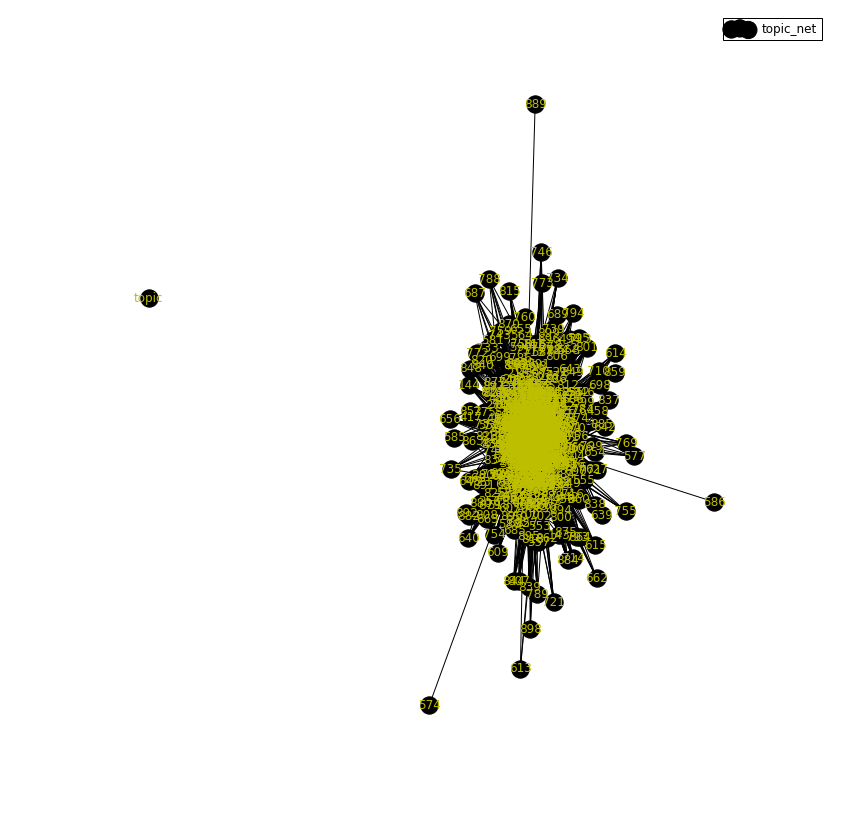

In [4]:
fb_csv = csv.reader(open('p2_data.csv'))
users = []
topics = []
fb_g = net.Graph()

for row in fb_csv:
    if row[0] not in users:
        users.append(row[0])
    if row[1] not in topics:
        topics.append(row[1])
    fb_g.add_edge(row[0], row[1], weight = row[2])

plt.figure(figsize=(11,11))
topic_net = bi.weighted_projected_graph(fb_g, topics, ratio=False)
weights=[math.log(edata['weight'])for f,t,edata in topic_net.edges(data=True)]

#L_lib= L.subgraph(Liberal)
#d = nx.degree(L_lib)
net.draw_spring(topic_net, label = 'topic_net', node_color='k',with_labels=True,node_size =300,font_color ='y')
plt.legend(["topic_net"])
plt.show()

#net.draw_networkx(topic_net,width=weights,edge_color=weights)

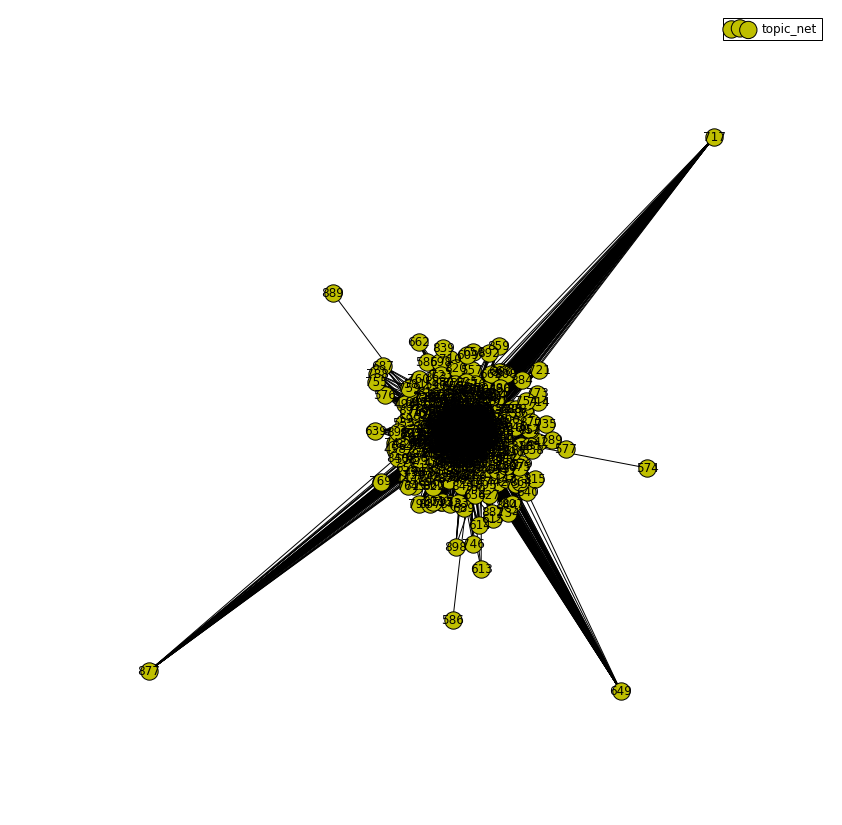

In [5]:

plt.figure(figsize=(11,11))
topic_net = bi.weighted_projected_graph(fb_g, topics, ratio=False)
topic_net=max(net.connected_component_subgraphs(topic_net),key=len)
weights=[math.log(edata['weight'])for f,t,edata in topic_net.edges(data=True)]
net.draw_spring(topic_net, label = 'topic_net', node_color='y',with_labels=True,node_size =300,font_color ='k')
plt.legend(["topic_net"])
plt.show()
#net.draw_networkx(topic_net,width=weights,edge_color=weights)



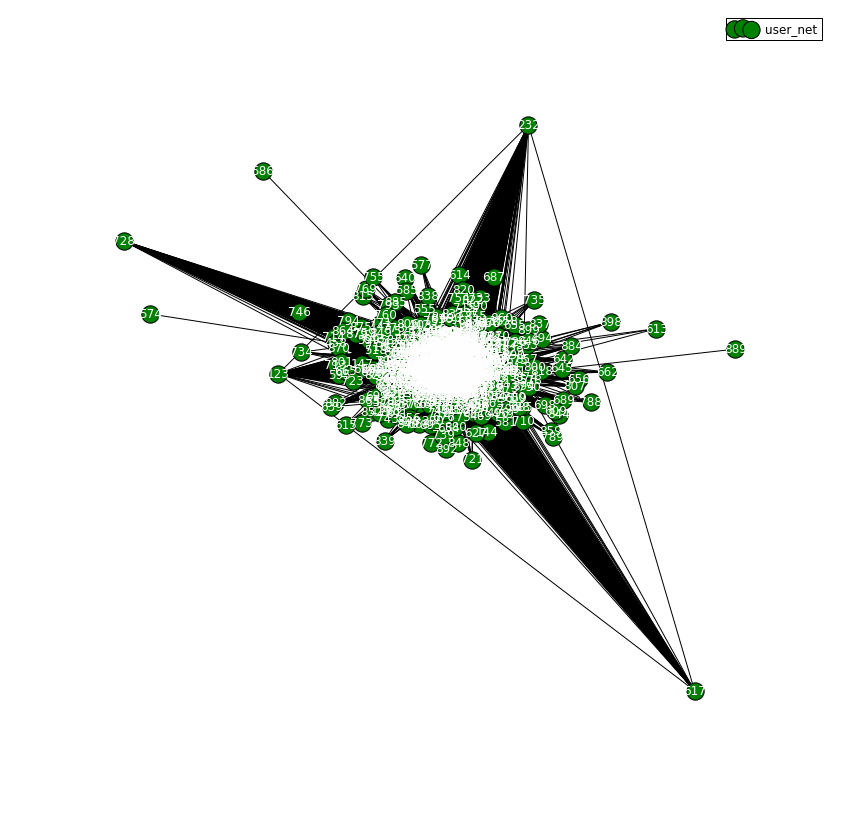

In [6]:
plt.figure(figsize=(11,11))
user_net = bi.weighted_projected_graph(fb_g, users, ratio=False)
user_net=max(net.connected_component_subgraphs(user_net),key=len)
weights=[math.log(edata['weight'])for f,t,edata in user_net.edges(data=True)]
net.draw_spring(topic_net, label = 'user_net', node_color='g',with_labels=True,node_size =300,font_color ='w')
plt.legend(["user_net"])
plt.show()

### 2. Reducing the Network

In [7]:
def trim_edges(fb_g,weight=1):
    fb_g2=net.Graph()
    for f, to, edata in fb_g.edges(data=True):
        if edata['weight']>weight:
            fb_g2.add_edge(f, to,edata)
    return fb_g2

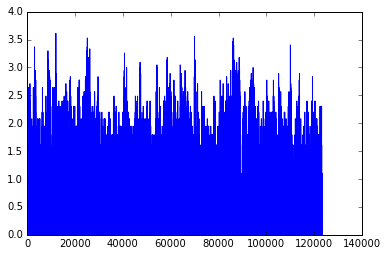

In [8]:
plt.plot(weights)

In [9]:
usernet_trim=trim_edges(user_net,weight=math.exp(0.9))

In [10]:
weights=[edata['weight'] for f,t,edata in usernet_trim.edges(data=True)]


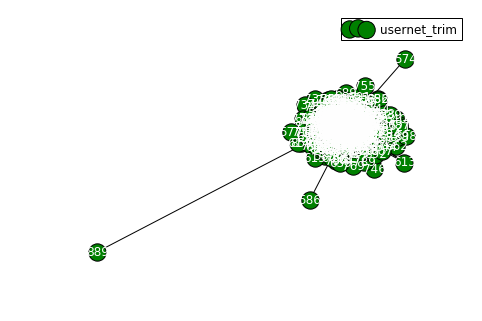

In [11]:
net.draw_spring(topic_net, label = 'usernet_trim', node_color='g',with_labels=True,node_size =300,font_color ='w')
plt.legend(["usernet_trim"])
plt.show()

### 3. Inferences About Groups

In [12]:
# Function defined sorted_map for sorting books based on their centrality value
def sorted_map(map):
    ms= sorted(map.iteritems(),key=lambda(k,v):(-v,k))
    return ms

In [15]:
#Compute Degree Of Centrality
d = net.degree(usernet_trim)
ds = sorted_map(d)
ds[0:10]

[('100', 458),
 ('13', 430),
 ('67', 425),
 ('18', 407),
 ('164', 403),
 ('82', 392),
 ('12', 379),
 ('10', 344),
 ('47', 340),
 ('377', 337)]

In [18]:
user_ud = usernet_trim.to_undirected()
fb_components = net.connected_component_subgraphs(user_ud)
net.is_directed(user_ud)


False

In [19]:
#Find Communities 

import community

part = community.best_partition(user_ud)
mod = community.modularity(part,user_ud)

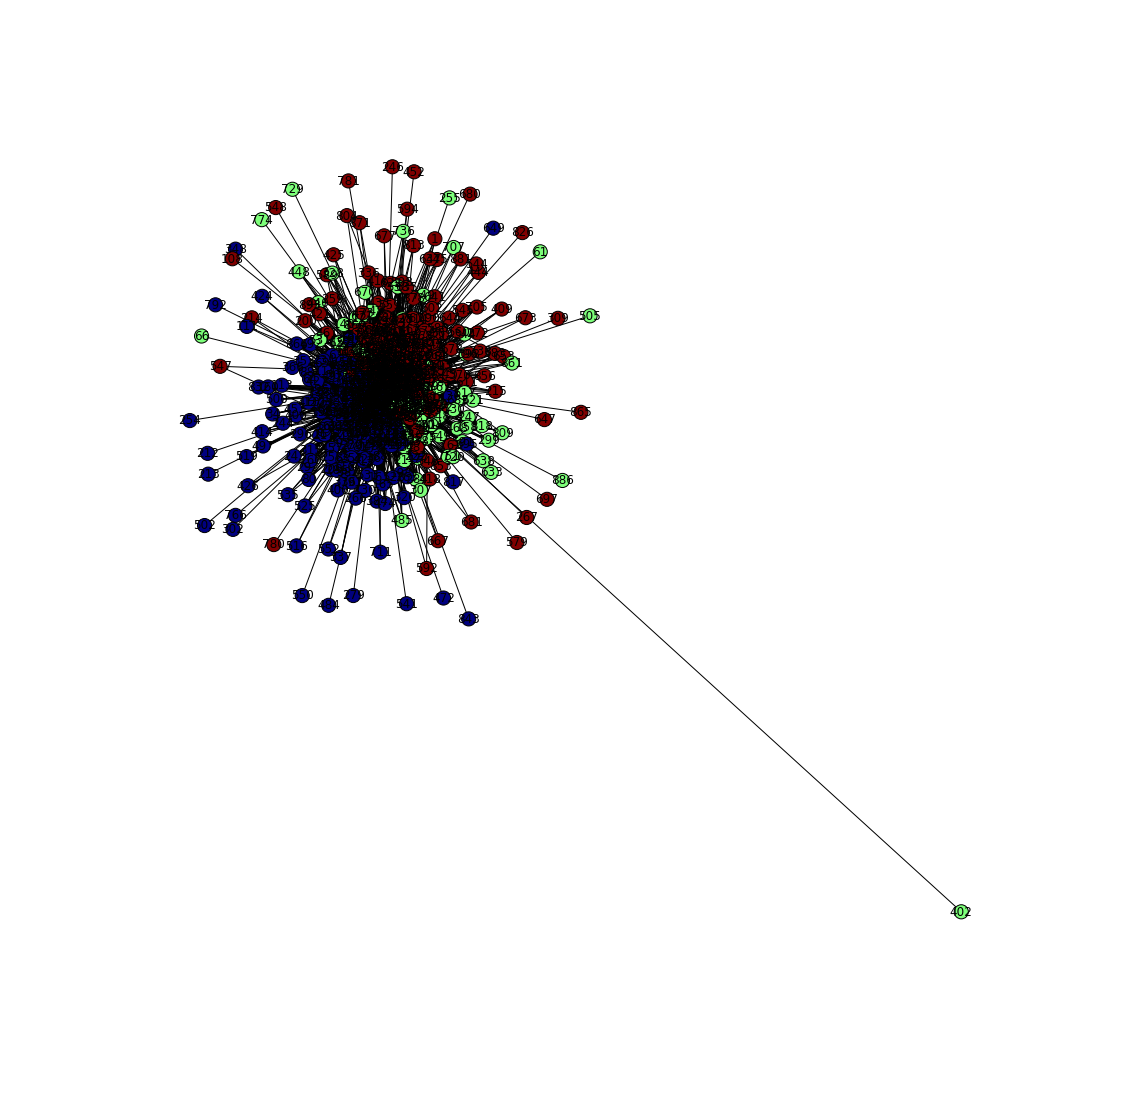

In [21]:
values = [part.get(node) for node in user_ud.nodes()]
plt.figure(figsize=(15,15))
pos=net.drawing.spring_layout(user_ud)
net.draw(user_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

In [22]:
# Examine node data
print user_ud.nodes(data=True)[0:5]

[('198', {}), ('344', {}), ('819', {}), ('346', {}), ('347', {})]


In [32]:
user_ud=fb_g

dcent=net.degree_centrality(user_ud)
dcent_s=sorted_map(dcent)
dcent_s

[('10', 0.14222222222222222),
 ('13', 0.13555555555555557),
 ('67', 0.12555555555555556),
 ('164', 0.11333333333333333),
 ('82', 0.11333333333333333),
 ('100', 0.1111111111111111),
 ('75', 0.10666666666666666),
 ('12', 0.10555555555555556),
 ('18', 0.10222222222222223),
 ('59', 0.09666666666666666),
 ('91', 0.09333333333333334),
 ('19', 0.08777777777777777),
 ('208', 0.08777777777777777),
 ('290', 0.08),
 ('20', 0.07888888888888888),
 ('291', 0.07777777777777778),
 ('16', 0.07666666666666666),
 ('194', 0.07444444444444444),
 ('228', 0.07222222222222222),
 ('237', 0.07222222222222222),
 ('3', 0.07222222222222222),
 ('8', 0.07111111111111111),
 ('131', 0.06888888888888889),
 ('47', 0.06888888888888889),
 ('17', 0.06777777777777778),
 ('377', 0.06666666666666667),
 ('28', 0.06222222222222222),
 ('185', 0.06),
 ('199', 0.06),
 ('93', 0.06),
 ('810', 0.058888888888888886),
 ('117', 0.057777777777777775),
 ('125', 0.057777777777777775),
 ('206', 0.057777777777777775),
 ('22', 0.0577777777777

In [33]:
ccent=net.closeness_centrality(user_ud)
ccent_s=sorted_map(ccent)
ccent

{'1': 0.3203448138878957,
 '10': 0.4725761837787154,
 '100': 0.48146396799808944,
 '101': 0.4127150826552024,
 '102': 0.41347690098959133,
 '103': 0.4242445286195286,
 '104': 0.36571609977324265,
 '105': 0.3858761603981242,
 '106': 0.3716318724365178,
 '107': 0.40635122197026957,
 '108': 0.33246918161203876,
 '109': 0.4214508205289014,
 '11': 0.39315684266978695,
 '110': 0.3961116023184989,
 '111': 0.33760529180272963,
 '112': 0.3574010548242698,
 '113': 0.3485042568823199,
 '114': 0.3629017595967778,
 '115': 0.4019759732814914,
 '116': 0.3459476619476619,
 '117': 0.4155864770150484,
 '118': 0.40089684315187674,
 '119': 0.3900759444686306,
 '12': 0.4673992928766012,
 '120': 0.35317479087285947,
 '121': 0.4023369755026693,
 '122': 0.4140501129595399,
 '123': 0.4019759732814914,
 '124': 0.41947773616312944,
 '125': 0.4307713675213675,
 '126': 0.3717860765329645,
 '127': 0.3685744321038439,
 '128': 0.41481687242798354,
 '129': 0.37647245564892623,
 '13': 0.4825010470890923,
 '130': 0.3500

In [34]:
bcent = net.betweenness_centrality(user_ud)
bcent_s = sorted_map(bcent)
bcent_s

[('10', 0.04891735658757288),
 ('13', 0.043830719047310875),
 ('67', 0.04038994363775583),
 ('59', 0.03758577006451385),
 ('82', 0.0342567240543641),
 ('75', 0.031513261643626375),
 ('12', 0.03030096057066459),
 ('164', 0.02954533063960384),
 ('100', 0.027476003328367846),
 ('18', 0.025769504235119048),
 ('208', 0.022712467769685548),
 ('91', 0.02222802401810914),
 ('194', 0.0221351618453909),
 ('19', 0.019809499069261372),
 ('291', 0.019706720773136694),
 ('8', 0.018751402008324543),
 ('290', 0.018185314638365042),
 ('252', 0.014898807538816158),
 ('16', 0.01488618377539579),
 ('228', 0.014727212653481921),
 ('3', 0.013199217573748595),
 ('20', 0.013102995321731483),
 ('47', 0.012958210852860303),
 ('22', 0.012915239177310217),
 ('265', 0.011771465410332749),
 ('125', 0.0116288984618017),
 ('121', 0.01114392908931389),
 ('131', 0.01091349250328572),
 ('377', 0.01069732040681062),
 ('237', 0.010403931874682179),
 ('17', 0.010389414440742824),
 ('37', 0.009472371425295036),
 ('53', 0.00